In [1]:
import pandas as pd
df = pd.read_csv('C:/CUB/sem2/ml/proj/CN_Dataset/cleaned_data.csv')


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, CategoricalNB
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns



print("Data Types:")
print(df.dtypes)
print("\nFirst 5 rows:")
print(df.head())

Data Types:
SuggestedJobRole                       object
keywords                               object
Logical quotient rating                 int64
hackathons                              int64
coding skills rating                    int64
public speaking points                  int64
self-learning capability?              object
Extra-courses did                      object
certifications                         object
workshops                              object
reading and writing skills             object
memory capability score                object
Interested subjects                    object
interested career area                 object
Type of company want to settle in?     object
Taken inputs from seniors or elders    object
Interested Type of Books               object
Management or Technical                object
hard/smart worker                      object
worked in teams ever?                  object
Introvert                              object
dtype: object

First 5

In [3]:
columns_to_convert = [
    'SuggestedJobRole', 'keywords', 'workshops', 'reading and writing skills', 'memory capability score','certifications',
    'Interested subjects', 'interested career area ', 'Type of company want to settle in?', 'Interested Type of Books', 'Management or Technical',
    'hard/smart worker'
]

# Convert columns to category dtype
for column in columns_to_convert:
    df[column] = df[column].astype('category')

# Check the new data types
print(df.dtypes)    

SuggestedJobRole                       category
keywords                               category
Logical quotient rating                   int64
hackathons                                int64
coding skills rating                      int64
public speaking points                    int64
self-learning capability?                object
Extra-courses did                        object
certifications                         category
workshops                              category
reading and writing skills             category
memory capability score                category
Interested subjects                    category
interested career area                 category
Type of company want to settle in?     category
Taken inputs from seniors or elders      object
Interested Type of Books               category
Management or Technical                category
hard/smart worker                      category
worked in teams ever?                    object
Introvert                               

In [5]:
# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['SuggestedJobRole'])

# Feature sets for different models

# 1. For MultinomialNB - use count-like numerical features
multinomial_features = ['Logical quotient rating', 'hackathons', 'coding skills rating', 
                      'public speaking points']
X_multinomial = df[multinomial_features]

# 2. For BernoulliNB - create binary features
bernoulli_features = ['self-learning capability?', 'Extra-courses did', 'worked in teams ever?', 'Introvert']
X_bernoulli = pd.get_dummies(df[bernoulli_features], drop_first=True)

# Add some binarized numerical features
X_bernoulli['high_coding'] = (df['coding skills rating'] > 5).astype(int)
X_bernoulli['high_logical'] = (df['Logical quotient rating'] > 5).astype(int)



NameError: name 'y_cat_train' is not defined

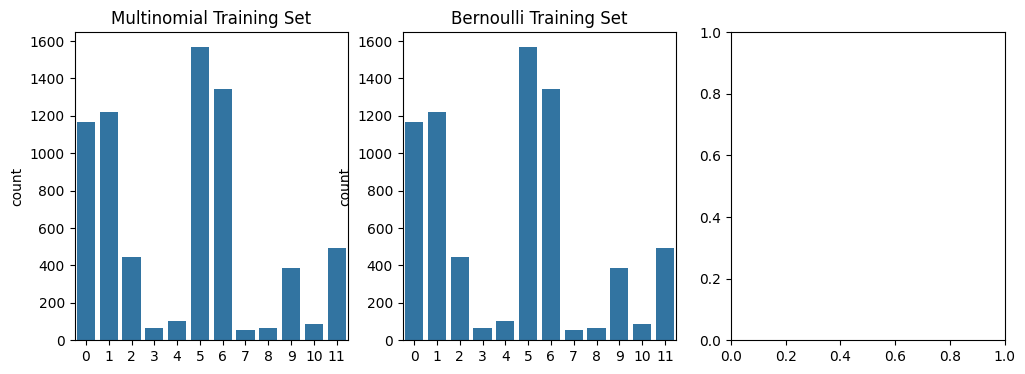

In [6]:
# Split data for each feature set
X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(
    X_multinomial, y, test_size=0.3, random_state=42)

X_bern_train, X_bern_test, y_bern_train, y_bern_test = train_test_split(
    X_bernoulli, y, test_size=0.3, random_state=42)


# Visualize train-test split
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.countplot(x=y_multi_train)
plt.title('Multinomial Training Set')
plt.subplot(1, 3, 2)
sns.countplot(x=y_bern_train)
plt.title('Bernoulli Training Set')
plt.subplot(1, 3, 3)
sns.countplot(x=y_cat_train)
plt.title('Categorical Training Set')
plt.tight_layout()
plt.show()

In [7]:
# Multinomial Naive Bayes
multi_nb = MultinomialNB()
multi_nb.fit(X_multi_train, y_multi_train)

# Predictions
y_multi_pred = multi_nb.predict(X_multi_test)

# Evaluation
print("Multinomial Naive Bayes Results:")
print(f"Accuracy: {accuracy_score(y_multi_test, y_multi_pred):.2f}")
print(classification_report(y_multi_test, y_multi_pred, target_names=label_encoder.classes_))

Multinomial Naive Bayes Results:
Accuracy: 0.23
                                           precision    recall  f1-score   support

                   Applications Developer       0.13      0.01      0.02       456
                  CRM Technical Developer       0.22      0.29      0.25       539
                       Database Developer       0.00      0.00      0.00       209
            Mobile Applications Developer       0.00      0.00      0.00        24
                Network Security Engineer       0.00      0.00      0.00        39
                       Software Developer       0.25      0.79      0.37       674
                        Software Engineer       0.16      0.02      0.04       596
Software Quality Assurance (QA) / Testing       0.00      0.00      0.00        17
           Systems Security Administrator       0.00      0.00      0.00        28
                        Technical Support       0.00      0.00      0.00       152
                              UX Desig

c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\vbhav\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
import numpy as np
from sklearn.utils import class_weight, resample
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer  # Assuming text data
from sklearn.preprocessing import LabelEncoder

# Sample data preparation (replace with your actual data loading)
# X should be your text data, y should be your labels
# Here's a mock example:
texts = ["software developer skills", "database admin experience", ...]  # Your text features
labels = ["Software Developer", "Database Developer", ...]  # Your target labels

# Convert text to features
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Encode labels
le = LabelEncoder()
y = le.fit_transform(labels)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Method 1: Class weights implementation
def train_with_class_weights(X_train, y_train, X_test, y_test):
    # Calculate class weights
    weights = class_weight.compute_class_weight(
        'balanced', 
        classes=np.unique(y_train), 
        y=y_train
    )
    sample_weights = np.array([weights[class_] for class_ in y_train])
    
    # Train model
    model = MultinomialNB(alpha=0.1)  # alpha for Laplace smoothing
    model.fit(X_train, y_train, sample_weight=sample_weights)
    
    # Evaluate
    y_pred = model.predict(X_test)
    print("With Class Weights:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    return model

# Method 2: Random oversampling implementation
def train_with_oversampling(X_train, y_train, X_test, y_test):
    # Convert sparse matrix to array for resampling
    X_train_arr = X_train.toarray()
    
    # Oversample
    unique_classes, counts = np.unique(y_train, return_counts=True)
    max_count = max(counts)
    
    X_resampled, y_resampled = [], []
    for class_ in unique_classes:
        X_class = X_train_arr[y_train == class_]
        n_samples = len(X_class)
        
        if n_samples < max_count:
            # Oversample
            X_oversampled = resample(
                X_class, 
                replace=True, 
                n_samples=max_count, 
                random_state=42
            )
            y_oversampled = np.array([class_] * max_count)
        else:
            X_oversampled = X_class
            y_oversampled = np.array([class_] * n_samples)
            
        X_resampled.append(X_oversampled)
        y_resampled.append(y_oversampled)
    
    X_res = np.concatenate(X_resampled)
    y_res = np.concatenate(y_resampled)
    
    # Convert back to sparse matrix
    X_res_sparse = type(X_train)(X_res)
    
    # Train model
    model = MultinomialNB(alpha=0.1)
    model.fit(X_res_sparse, y_res)
    
    # Evaluate
    y_pred = model.predict(X_test)
    print("\nWith Random Oversampling:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    return model

# Method 3: SMOTE implementation (for demonstration, though less ideal for text)
def train_with_smote(X_train, y_train, X_test, y_test):
    # SMOTE works better with dense arrays
    X_train_arr = X_train.toarray()
    
    # Apply SMOTE
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_train_arr, y_train)
    
    # Convert back to sparse matrix
    X_res_sparse = type(X_train)(X_res)
    
    # Train model
    model = MultinomialNB(alpha=0.1)
    model.fit(X_res_sparse, y_res)
    
    # Evaluate
    y_pred = model.predict(X_test)
    print("\nWith SMOTE:")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    return model

# Baseline model without balancing
def train_baseline(X_train, y_train, X_test, y_test):
    model = MultinomialNB(alpha=0.1)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    print("\nBaseline (No Balancing):")
    print(classification_report(y_test, y_pred, target_names=le.classes_))
    print("Accuracy:", accuracy_score(y_test, y_pred))
    return model

# Run all methods
print("Class Distribution:", dict(zip(le.classes_, np.bincount(y))))
baseline_model = train_baseline(X_train, y_train, X_test, y_test)
weights_model = train_with_class_weights(X_train, y_train, X_test, y_test)
oversample_model = train_with_oversampling(X_train, y_train, X_test, y_test)
smote_model = train_with_smote(X_train, y_train, X_test, y_test)

AttributeError: 'ellipsis' object has no attribute 'lower'